   Registration Number        Name  TT-1 Marks
0               202501   Student 1          11
1               202502   Student 2           8
2               202503   Student 3          17
3               202504   Student 4          19
4               202505   Student 5          15
5               202506   Student 6          12
6               202507   Student 7          17
7               202508   Student 8           9
8               202509   Student 9          11
9               202510  Student 10          14
10              202511  Student 11           7
11              202512  Student 12          11
12              202513  Student 13          15
13              202514  Student 14          15
14              202515  Student 15          12
15              202516  Student 16           9
16              202517  Student 17           8
17              202518  Student 18          12
18              202519  Student 19          12
19              202520  Student 20           7
20           

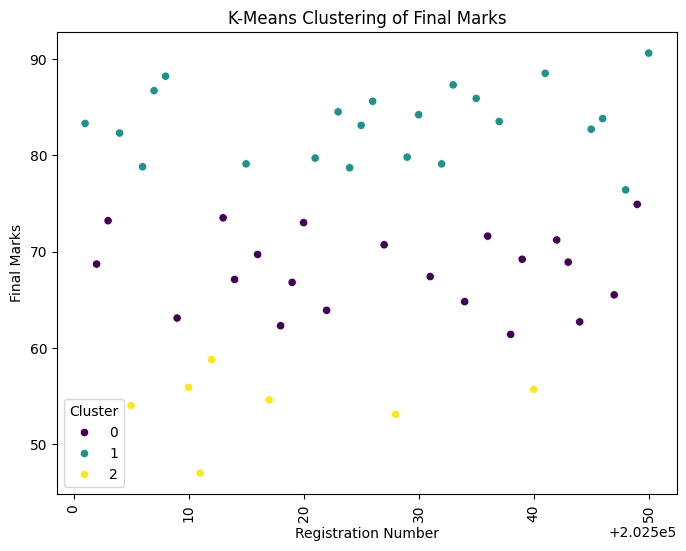

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Generate sample student data
np.random.seed(42)
students = [f"Student {i}" for i in range(1, 51)]
registration_numbers = [f"2025{i:02d}" for i in range(1, 51)]

tt1_marks = np.random.randint(5, 21, size=50)
tt2_marks = np.random.randint(5, 21, size=50)

# Create and save term test 1 result
tt1_df = pd.DataFrame({
    'Registration Number': registration_numbers,
    'Name': students,
    'TT-1 Marks': tt1_marks
})
print(tt1_df)
tt1_df.to_csv("term-test-1-result.csv", index=False)

# Create and save term test 2 result
tt2_df = pd.DataFrame({
    'Registration Number': registration_numbers,
    'Name': students,
    'TT-2 Marks': tt2_marks
})
print(tt2_df)
tt2_df.to_csv("term-test-2-result.csv", index=False)

# Load both files
tt1_df = pd.read_csv("term-test-1-result.csv")
tt2_df = pd.read_csv("term-test-2-result.csv")

# Merge dataframes on Registration Number
merged_df = pd.merge(tt1_df, tt2_df, on=['Registration Number', 'Name'])
print(merged_df)

# Create Best and Average Term Test Marks
merged_df['Best Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df['Average Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

# Drop TT-1 Marks and TT-2 Marks columns
merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)

# Generate attendance and term final marks
attendance_marks = np.random.randint(5, 11, size=50)
term_final_marks = np.random.randint(50, 101, size=50)

attendance_df = pd.DataFrame({
    'Registration Number': registration_numbers,
    'Attendance Marks': attendance_marks,
    'Term Final Marks': term_final_marks
})
attendance_df.to_csv("attendance_term_final.csv", index=False)

# Load attendance and term final data
attendance_df = pd.read_csv("attendance_term_final.csv")

# Merge with term test dataframe
final_df = pd.merge(merged_df, attendance_df, on='Registration Number')

# Compute final marks
final_df['Final Marks'] = final_df['Term Final Marks'] * 0.7 + final_df['Average Marks'] + final_df['Attendance Marks']
print(final_df)

# Save final result to CSV
final_df.to_csv("final-result.csv", index=False)

# Clustering final marks
X = final_df[['Final Marks']]
kmeans = KMeans(n_clusters=3, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_df['Registration Number'], y=final_df['Final Marks'], hue=final_df['Cluster'], palette='viridis')
plt.xlabel("Registration Number")
plt.ylabel("Final Marks")
plt.title("K-Means Clustering of Final Marks")
plt.legend(title="Cluster")
plt.xticks(rotation=90)
plt.show()